# Capstone - Step5: 

## Create the Binary Mask for the satellite images
<hr style="border:2px solid #007700;">


In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the path to your GeoTIFF file
geo_tiff_path = 'median_composite.tif'

# Open the GeoTIFF file
with rasterio.open(geo_tiff_path) as dataset:
    # Read the NIR band (band 4)
    nir_band = dataset.read(4)
    # Get metadata if needed
    nir_meta = dataset.meta
    nodata_value = dataset.nodata

In [5]:
def print_imageBand_hist(band, bandname):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # plot the image from the band
    ax[0].imshow(band, cmap='gray')
    ax[0].set_title(bandname)
        
    # Extract valid data by filtering out NoData values
    valid_data = band[band != nodata_value].flatten()

    # plot the histogram
    ax[1].hist(valid_data, bins=200, color='blue', edgecolor='black')
    ax[1].set_title(f'Histogram of {bandname} Data')
    ax[1].set_xlabel('Pixel Values')
    ax[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [7]:
def print_manualMask(file_auto, file_manual):
    
    # Open the GeoTIFF file
    with rasterio.open(file_auto) as dataset:
        # Read the mask (band 1)
        autoMask = dataset.read(1)

    with rasterio.open(file_manual) as dataset:
        # Read the mask (band 1)
        manualMask = dataset.read(1)

    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].imshow(autoMask, cmap='gray')
    ax[0].set_title('automask filtering')

    ax[1].imshow(manualMask, cmap='gray')
    ax[1].set_title('manual mask result')

    plt.axis('off')
    plt.show()
        

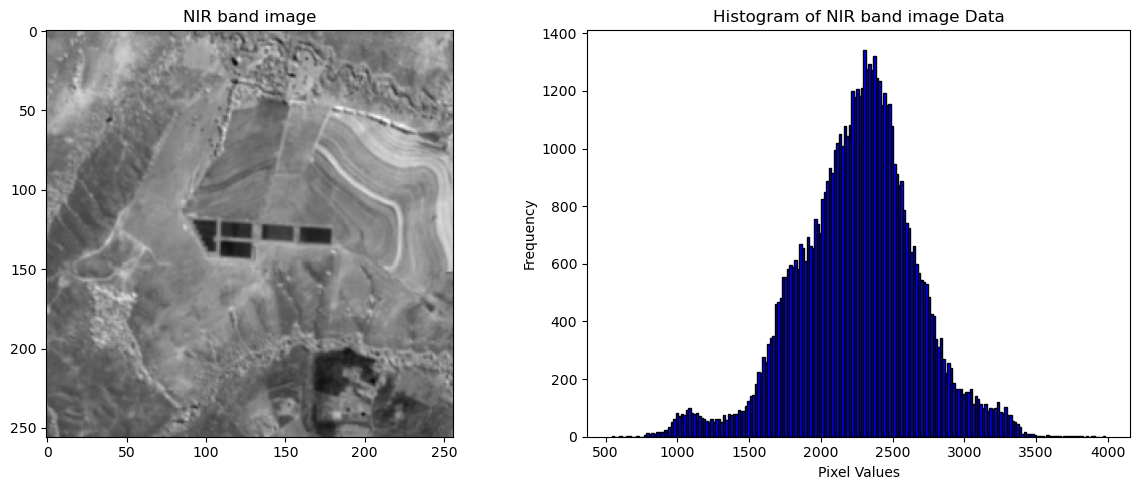

In [9]:
print_imageBand_hist(nir_band, 'NIR band image')

In [11]:
# Define the threshold value
threshold = 1500  # Replace with your chosen threshold

# Ensure nodata_value is a float
nodata_value = float(nodata_value) if nodata_value is not None else -9999.0

# Create a boolean mask for valid data
valid_mask = nir_band != nodata_value

# Initialize the binary mask with the nodata_value as float32
binary_mask = np.full(nir_band.shape, nodata_value, dtype='float32')

# Apply the threshold only to valid data, using float values
binary_mask[valid_mask] = np.where(nir_band[valid_mask] < threshold, 1.0, 0.0)

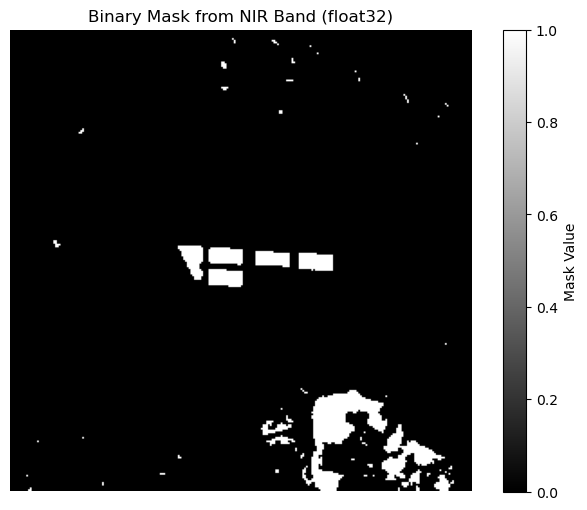

In [13]:
# Visualize the binary mask
plt.figure(figsize=(8, 6))
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask from NIR Band (float32)')
plt.colorbar(label='Mask Value')
plt.axis('off')
plt.show()


In [15]:
# Save the binary mask to a GeoTIFF file
binary_meta = nir_meta.copy()
binary_meta.update({
    'dtype': 'float32',
    'count': 1,
    'nodata': nodata_value
})

with rasterio.open('nir_binary_mask_float32.tif', 'w', **binary_meta) as dst:
    dst.write(binary_mask, 1)

print("Binary mask saved as 'nir_binary_mask_float32.tif'")

Binary mask saved as 'nir_binary_mask_float32.tif'


### After editing the image, we manually cleaned up the surrounding pixels not part of the photovoltaic plant. 
### We used  QGIS with the 'Serval' plug-in for manual raster editing.

In [18]:
# Open the GeoTIFF file
with rasterio.open('nir_binary_mask_float32_sirgas_albers.tif') as dataset:
    # Read the mask (band 1)
    treated_mask = dataset.read(1)
    

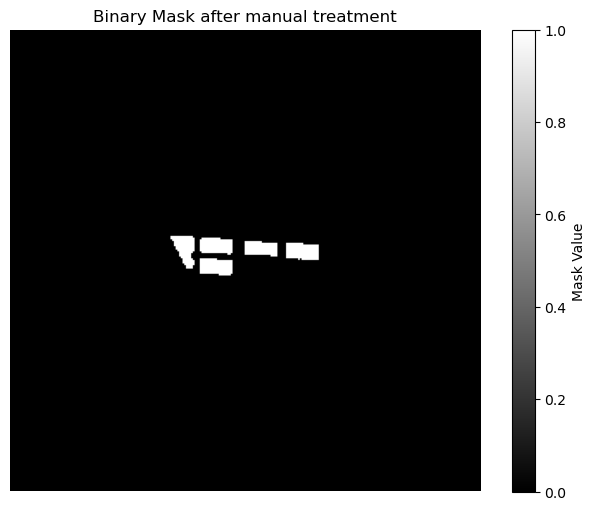

In [20]:
# Visualize the binary mask
plt.figure(figsize=(8, 6))
plt.imshow(treated_mask, cmap='gray')
plt.title('Binary Mask after manual treatment')
plt.colorbar(label='Mask Value')
plt.axis('off')
plt.show()

In [22]:
# Define the path to your GeoTIFF file
geo_tiff_path = '.\\data\\Helio_Valgas_1.tif'

# Open the GeoTIFF file
with rasterio.open(geo_tiff_path) as dataset:
    # Read the NIR band (band 4)
    nir_band = dataset.read(4)
    # Get metadata if needed
    nir_meta = dataset.meta
    nodata_value = dataset.nodata

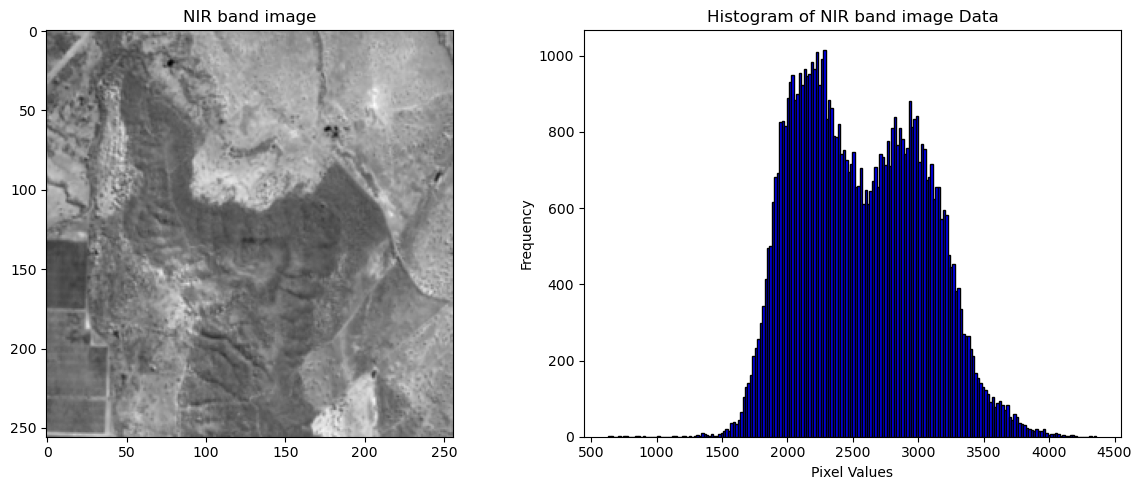

In [24]:
print_imageBand_hist(nir_band, 'NIR band image')

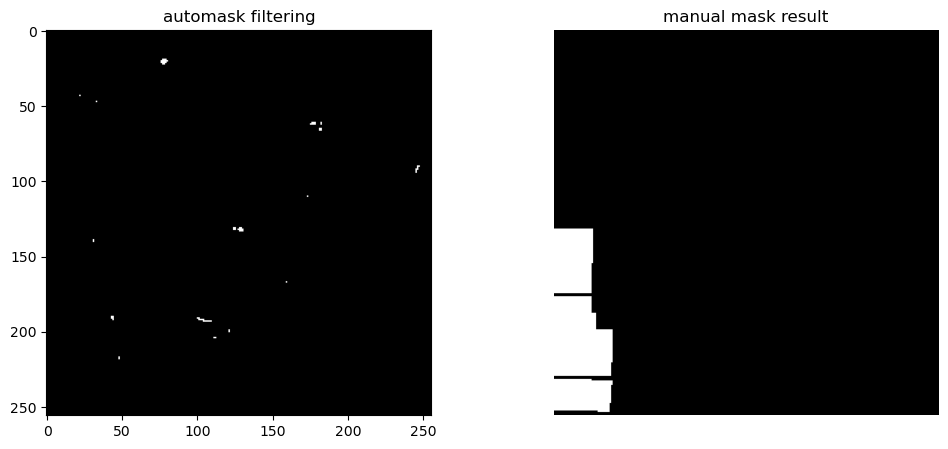

In [26]:
print_manualMask('.\\data\\Helio_Valgas_1_automask.tif', '.\\data\\Helio_Valgas_1_manual.tif' )

In [28]:
# Define the path to your GeoTIFF file
geo_tiff_path = '.\\data\\Janauba_pequena_1.tif'

# Open the GeoTIFF file
with rasterio.open(geo_tiff_path) as dataset:
    # Read the NIR band (band 4)
    nir_band = dataset.read(4)
    # Get metadata if needed
    nir_meta = dataset.meta
    nodata_value = dataset.nodata

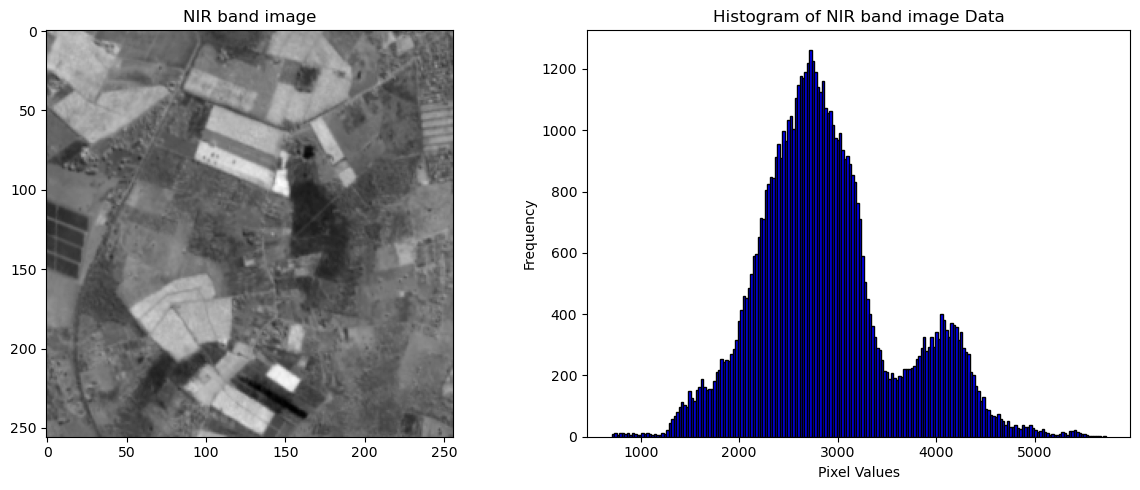

In [30]:
print_imageBand_hist(nir_band, 'NIR band image')

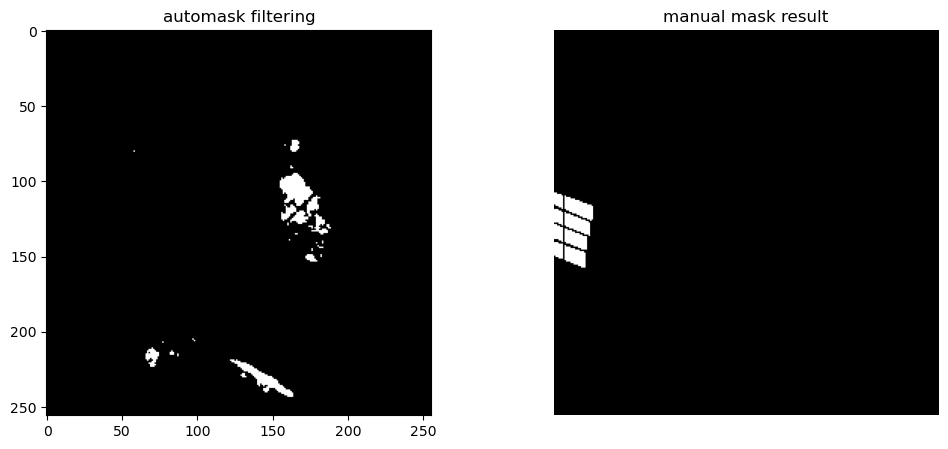

In [32]:
print_manualMask('.\\data\\Janauba_pequena_1_automask.tif', '.\\data\\Janauba_pequena_1_manual.tif' )

In [34]:
# Define the path to your GeoTIFF file
geo_tiff_path = '.\\data\\Euler_Paranhos_1.tif'

# Open the GeoTIFF file
with rasterio.open(geo_tiff_path) as dataset:
    # Read the NIR band (band 4)
    nir_band = dataset.read(4)
    # Get metadata if needed
    nir_meta = dataset.meta
    nodata_value = dataset.nodata

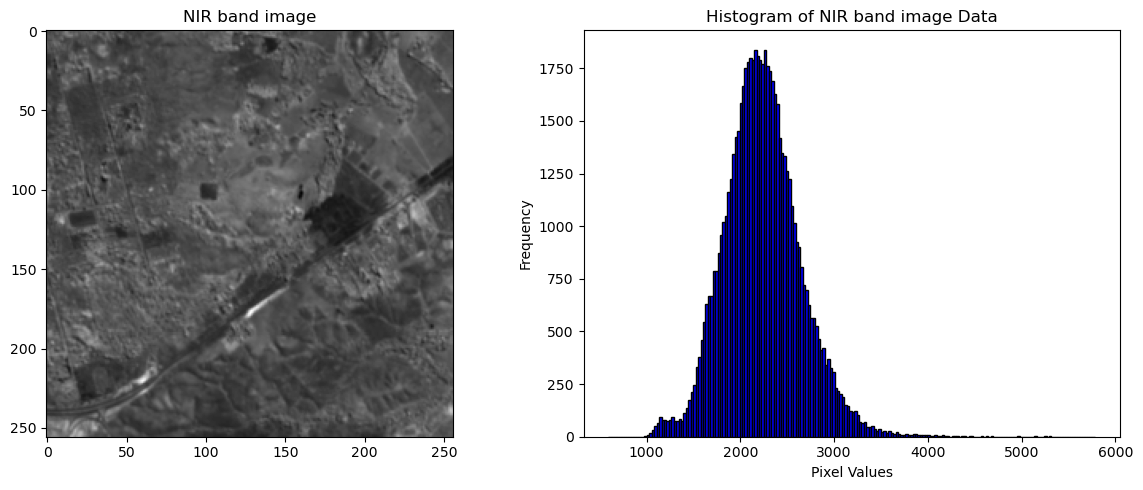

In [36]:
print_imageBand_hist(nir_band, 'NIR band image')

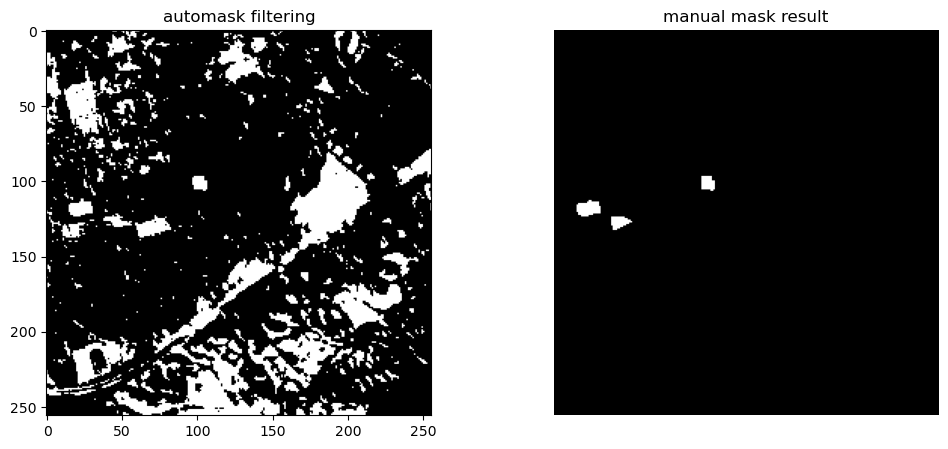

In [38]:
print_manualMask('.\\data\\Euler_Paranhos_1_automask.tif', '.\\data\\Euler_Paranhos_1_manual.tif' )